          [명동, 종로를 제외한 잠재지역의 선형회귀] 


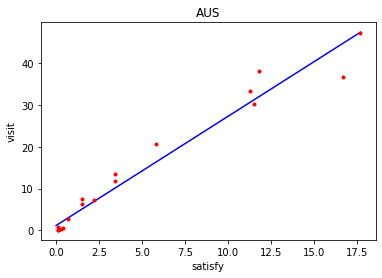

잠재지역 중 방문율 20% 이상인 지역 : 신촌/ 홍대주변, 강남역, 잠실, 

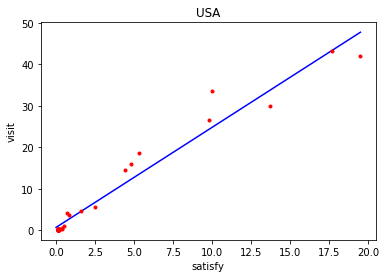

잠재지역 중 방문율 20% 이상인 지역 : 신촌/ 홍대주변, 강남역, 이태원 (이태원 세계 음식거리  한남동), 

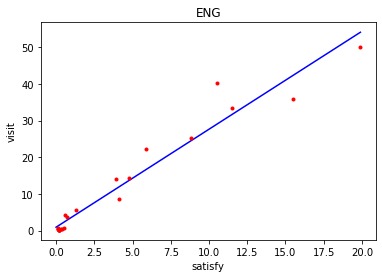

잠재지역 중 방문율 20% 이상인 지역 : 신촌/ 홍대주변, 강남역, 

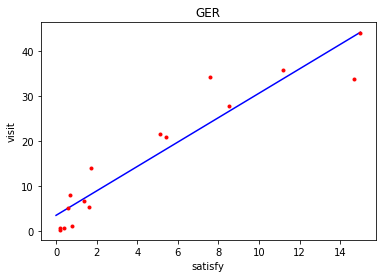

잠재지역 중 방문율 20% 이상인 지역 : 신촌/ 홍대주변, 강남역, 

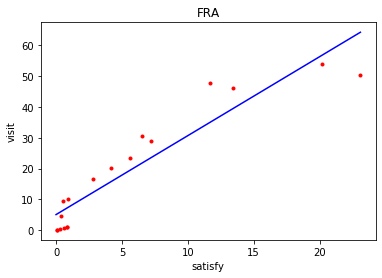

잠재지역 중 방문율 20% 이상인 지역 : 신촌/ 홍대주변, 강남역, 

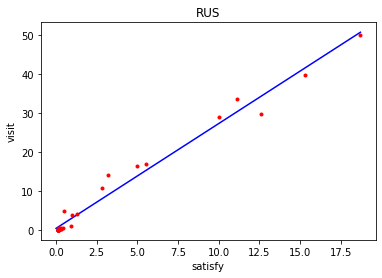

잠재지역 중 방문율 20% 이상인 지역 : 동대문 패션타운, 강남역, 잠실, 

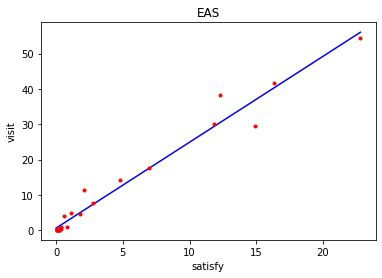

잠재지역 중 방문율 20% 이상인 지역 : 동대문 패션타운, 잠실, 

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import folium


fileMatrixV=[]
with open("공통att방문횟수.csv","r",encoding="utf-8") as fileOpen:
    for i in fileOpen:
        fileMatrixV.append(i.strip("\n").split(","))
        
fileMatrixS=[]
with open("공통att만족도.csv","r",encoding="utf-8") as fileOpen:
    for i in fileOpen:
        fileMatrixS.append(i.strip("\n").split(","))
        
#위치별 위경도
laLong={"신촌/ 홍대주변":[37.5567851,126.9237568],"강남역":[37.4979462,127.0254323],"이태원 (이태원 세계 음식거리  한남동)":[37.5345372,126.9923903],
       "잠실":[37.5132654,127.0979449],"동대문 패션타운":[37.5677041,127.0066527]}
        
print("          [명동, 종로를 제외한 잠재지역의 선형회귀] ")
myMap=folium.Map(location=[37.566345,126.977893],zoom_start=12)
color=["","blue","black","red","beige","purple","pink","green"]
for i in range(1,8):
    
    att=[]
    V=[]
    S=[]
    x=[]
    y=[]
    forSortS=[]
    forSortV=[]
    for j in range(1,len(fileMatrixV[0])):
        if fileMatrixV[i][j]=="0" or fileMatrixS[i][j]=="0" or ("종로" in fileMatrixV[0][j]) or ("명동" in fileMatrixV[0][j]):
            continue
        else:
            forSortS.append([float(fileMatrixS[i][j]),fileMatrixV[0][j]])
            forSortV.append([float(fileMatrixV[i][j]),fileMatrixV[0][j]])
            att.append(fileMatrixV[0][j])
            S.append(float(fileMatrixS[i][j]))
            V.append(float(fileMatrixV[i][j]))
            x.append([float(fileMatrixS[i][j])])
            y.append([float(fileMatrixV[i][j])])
        
    
    #np array
    x=np.array(x)
    y=np.array(y)
    #상수항 결합
    x_b=np.c_[np.ones((len(x),1)),x]
    #회귀분석
    regression=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
    
    #선형회귀 함수 그리기
    x_pre=np.array([[0],[max(S)]])
    x_pre_b=np.c_[np.ones((2,1)),x_pre]
    y_pre=x_pre_b.dot(regression)
    
    #회귀선
    plt.plot(x_pre,y_pre,"b-")
    
    #점
    plt.plot(x,y,"r.")
    plt.xlabel('satisfy')
    plt.ylabel('visit')
    plt.title(fileMatrixV[i][0])
    fig=plt.gcf()
    plt.show()
    fig.savefig("regression "+fileMatrixV[i][0]+".pdf")
    print("잠재지역 중 방문율 20% 이상인 지역 : ",end="")
    forMap=[]
    for k in range(len(S)):
        if V[k]>20 and (V[k]-regression[1][0]*S[k]-regression[0][0]<0):
            print(forSortS[k][1],end=", ")
            forMap.append(forSortS[k][1])
    
    
    
    #각국가 각지도(중심은 서울시청)
    eachMap=folium.Map(location=[37.566345,126.977893],zoom_start=12)
    for k in forMap:
        folium.Marker(laLong[k],popup=k,icon=folium.Icon(color=color[i])).add_to(eachMap)
    eachMap.save(fileMatrixV[i][0]+"map.html")
    #모든국가 한지도
    for k in forMap:
        folium.Marker([laLong[k][0]+i/800,laLong[k][1]+i/800],popup=k,icon=folium.Icon(color=color[i])).add_to(myMap)
    
        
myMap.save("all_contry_myMap.html")
    
    
    
    